In [21]:
!git clone "https://github.com/IEEE-CISCodeCraft/Machine-Learning-Simplified.git"

fatal: destination path 'Machine-Learning-Simplified' already exists and is not an empty directory.


In [22]:
!pip install pycaret

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Read the dataset as pandas Dataframe
data = pd.read_csv("/content/Machine-Learning-Simplified/Day-4/heart.csv")

In [25]:
# Print the data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
# Get insights of Data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [27]:
# Search for any NULL values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
# Separate features (X) and target (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [29]:
# Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

In [30]:
# Create a DataFrame with encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [31]:
# Concatenate encoded features with remaining numerical features
X_final = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

In [32]:
# Normalize numerical features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_final)

In [33]:
# Convert numpy array back to DataFrame with correct column names
X_normalized_df = pd.DataFrame(X_normalized, columns=X_final.columns)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

In [35]:
# Set up the PyCaret experiment
experiment = setup(data=pd.concat([X_train, y_train], axis=1), target='HeartDisease')

,Description,Value
0,Session id,4338
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(734, 16)"
4,Transformed data shape,"(734, 16)"
5,Transformed train set shape,"(513, 16)"
6,Transformed test set shape,"(221, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [36]:
# Compare various models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8499,0.9130,0.8679,0.8609,0.8630,0.6968,0.6996,0.4990
nb,Naive Bayes,0.8458,0.9095,0.8679,0.8540,0.8594,0.6884,0.6914,0.0590
gbc,Gradient Boosting Classifier,0.8457,0.9013,0.8750,0.8517,0.8617,0.6872,0.6908,0.2980
lightgbm,Light Gradient Boosting Machine,0.8457,0.8958,0.8857,0.8441,0.8629,0.6865,0.6912,0.8120
lr,Logistic Regression,0.8420,0.9157,0.8857,0.8366,0.8593,0.6794,0.6834,0.7800
ridge,Ridge Classifier,0.8420,0.0000,0.8857,0.8362,0.8592,0.6793,0.6831,0.0520
lda,Linear Discriminant Analysis,0.8381,0.9142,0.8786,0.8350,0.8552,0.6716,0.6750,0.0660
rf,Random Forest Classifier,0.8380,0.9133,0.8714,0.8421,0.8542,0.6718,0.6770,0.5620
knn,K Neighbors Classifier,0.8343,0.8879,0.8821,0.8297,0.8537,0.6630,0.6678,0.0690
xgboost,Extreme Gradient Boosting,0.8340,0.8913,0.8607,0.8438,0.8505,0.6636,0.6673,0.3180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [37]:
# Fine-tune the best model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9038,0.9717,0.8929,0.9259,0.9091,0.8071,0.8077
1,0.8462,0.9152,0.8929,0.8333,0.8621,0.6886,0.6907
2,0.8654,0.9643,0.9286,0.8387,0.8814,0.7267,0.7318
3,0.8235,0.9084,0.8571,0.8276,0.8421,0.6422,0.6428
4,0.8431,0.8882,0.9286,0.8125,0.8667,0.6782,0.6872
5,0.8235,0.8835,0.8929,0.8065,0.8475,0.6394,0.6441
6,0.8039,0.9037,0.7857,0.8462,0.8148,0.6071,0.6090
7,0.8627,0.9084,0.8929,0.8621,0.8772,0.7217,0.7223
8,0.8627,0.9115,0.9643,0.8182,0.8852,0.7173,0.7324


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
# Finalize the best model
final_model = finalize_model(tuned_model)

In [39]:
# Evaluate model using different graphs
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

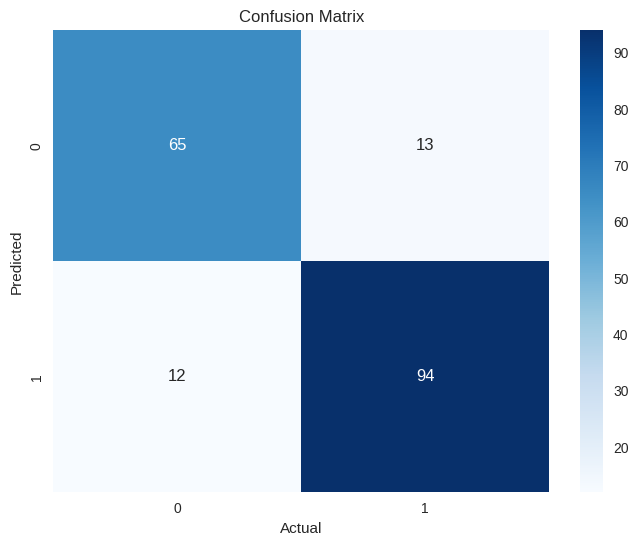

In [40]:
# Make predictions using the final model
predictions = predict_model(final_model, data=X_test)

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(predictions['prediction_label'], y_test, rownames=['Predicted'], colnames=['Actual'])

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()